In [2]:
import os, json
import numpy as np

count = 0
lst = []
with open("testingSetScores.json", "r") as f:
    data = json.load(f)
    for k in data:
        initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
        optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
        initial_prompt = list(data[k]["initial_prompt"].keys())[0]
        optimized_prompt = list(data[k]["optimized_prompt"].keys())[0]
                
        delta = optimized_prompt_score - initial_prompt_score
        # NOTE: 5 prompts misclassified as improved. Although delta > 0, the initial prompt == optimized prompt.
        # if initial_prompt == optimized_prompt and delta > 0:
        #     count += 1
        #     lst.append(k)
        
        if delta > 0 and initial_prompt != optimized_prompt:
            count += 1
            lst.append(k)

assert count == len(lst)
count, lst

(4,
 ["You are a very smart chemistry professor. Answer the student's question concisely and clearly \\ \nIf you do not know the answer, say so.\n\nHere is a question:\n{input}",
  'Summarize this for a second-grade student:\n\nPLACEHOLDER',
  'PLACEHOLDER your unique perspective guide your decisions.',
  'Now do the same procedure on following sentence: PLACEHOLDER'])

In [2]:
import os, json
import numpy as np

# walk = sorted(os.walk("."), key=lambda x: x[0])[::-1]
# for dirpath, dirnames, filenames in walk:
#     if "testingSetScores.json" in filenames:
#         data = json.load(open(os.path.join(dirpath, "testingSetScores.json"), "r"))
#         # sort data
#         data = dict(sorted(data.items(), key=lambda x: x[1]["ID"]))
#         deltas = []
#         for k in data:
#             initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
#             optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
#             delta = optimized_prompt_score - initial_prompt_score
#             deltas.append(delta)
            
#         print(deltas)
#         avg_change = sum(deltas) / len(deltas)
#         print(f"Avg change: {dirpath}: {avg_change}")
        
with open("testingSetScores.json", "r") as f:
    data = json.load(f)
    deltas = []
    for k in data:
        initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
        optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
        delta = optimized_prompt_score - initial_prompt_score
        deltas.append(delta)
        
    print(deltas)
    avg_change = np.mean(deltas)
    std = np.std(deltas)
    ci = 1.96 * std / np.sqrt(len(deltas))
    print(f"Avg change: {avg_change}")
    print(f"Std: {std}")
    print(f"95% CI: {ci}")
    
    # Plot the points on a vertical line with the confidence interval
    # import matplotlib.pyplot as plt
    # xs = np.zeros(len(deltas))
    # plt.figure()
    # plt.errorbar(xs, deltas, yerr=ci, fmt='o')
    # plt.show()

[2.857142857142861, 17.142857142857146, 0.0, 37.142857142857146, 42.857142857142854]
Avg change: 20.0
Std: 17.42622935083075
95% CI: 15.274763500624156


In [3]:
temp = np.array(deltas)
print(f"Number of prompts that worsened: {len(temp[temp < 0])}")
print(f"Number of prompts that improved: {len(temp[temp > 0])}")
print(f"Number of prompts that stayed the same: {len(temp[temp == 0])}")


Number of prompts that worsened: 0
Number of prompts that improved: 4
Number of prompts that stayed the same: 1


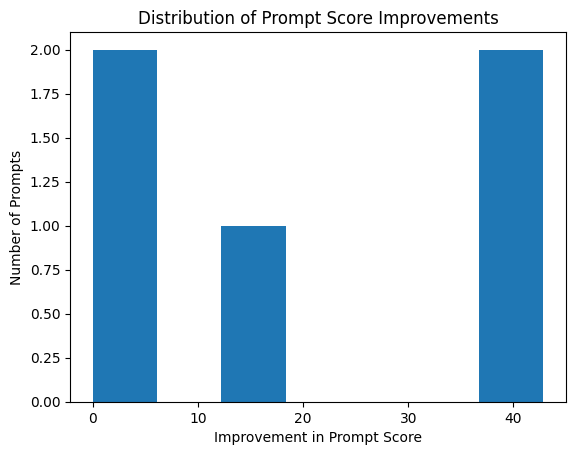

In [4]:
import matplotlib.pyplot as plt
plt.hist(deltas, bins=7)
plt.xlabel("Improvement in Prompt Score")
plt.ylabel("Number of Prompts")
plt.title("Distribution of Prompt Score Improvements")
plt.show()